##### 🌺KNN

In [81]:
# Import Library
import pandas as pd
import math
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [82]:
# Load dataset 
df = pd.read_csv('pima_indians_diabetes_with_header.csv')
df = df.dropna()

In [83]:
# Pisahkan fitur dan target
X = df.drop(columns='Outcome').values
y = df['Outcome'].values

In [84]:
# Split 80% train, 20% test
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Menghitung Distance menggunakan Euclidean
def euclidean_distance(p1, p2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))

In [86]:
# Fungsi klasifikasi KNN Manual
def classify_point(X_train, y_train, p, k):
    distances = []
    for xi, yi in zip(X_train, y_train):
        dist = euclidean_distance(p, xi)
        distances.append((dist, yi))
    distances = sorted(distances)[:k]
    freq_0 = sum(1 for d in distances if d[1] == 0)
    freq_1 = sum(1 for d in distances if d[1] == 1)
    return 0 if freq_0 > freq_1 else 1

🔍 Evaluasi Akurasi untuk Berbagai Nilai k:
k = 1 ➜ Akurasi = 61.69%
k = 3 ➜ Akurasi = 68.18%
k = 5 ➜ Akurasi = 70.13%
k = 7 ➜ Akurasi = 72.08%
k = 9 ➜ Akurasi = 70.78%
k = 11 ➜ Akurasi = 71.43%

✅ Model KNN terbaik: k = 7 dengan akurasi = 72.08%
📉 MSE (Mean Squared Error) untuk model KNN terbaik (k=7) adalah: 0.2792


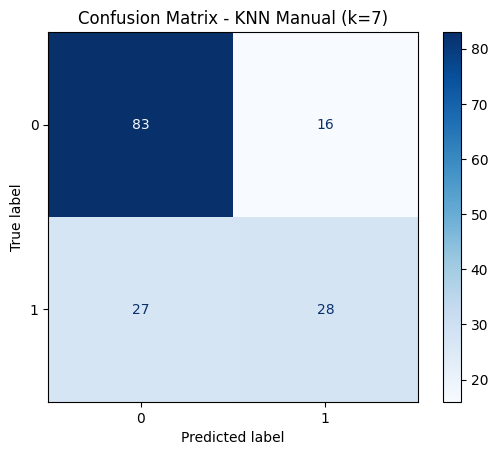

In [ ]:
# Mencari nilai k terbaik
# k : jumlah tetangga terdekat yg dipakai untuk melihat klasifikasi
best_k = None
best_accuracy = 0
best_y_pred = []

print("🔍 Evaluasi Akurasi untuk Berbagai Nilai k:")
for k in [1, 3, 5, 7, 9, 11]:
    y_pred = []
    for p in X_test:
        pred = classify_point(X_train, y_train, p, k)
        y_pred.append(pred)

    correct = sum(1 for true, pred in zip(y_test, y_pred) if true == pred)
    accuracy = correct / len(y_test) * 100
    print(f"k = {k} ➜ Akurasi = {accuracy:.2f}%")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_y_pred = y_pred.copy()
print(f"\n✅ Model KNN terbaik: k = {best_k} dengan akurasi = {best_accuracy:.2f}%")

# Hitung MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, best_y_pred)
print(f"📉 MSE (Mean Squared Error) untuk model KNN terbaik (k={best_k}) adalah: {mse:.4f}")

# Membuat Confusion Matrix untuk k terbaik
cm = confusion_matrix(y_test, best_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix - KNN Manual (k={best_k})")
plt.show()

##### 🌺Linear Regression

In [88]:
# Input: Glucose, Target: Outcome
n = len(df)
train_size = int(0.8 * n)
test_size = n - train_size

train_input = np.array(df['Glucose'][:train_size]).reshape(train_size, 1)
train_output = np.array(df['Outcome'][:train_size]).reshape(train_size, 1)

test_input = np.array(df['Glucose'][train_size:]).reshape(test_size, 1)
test_output = np.array(df['Outcome'][train_size:]).reshape(test_size, 1)

In [ ]:
# Membuat model regresi linear 
class LinearRegression: 
    def __init__(self): 
        self.parameters = {} 

    def forward_propagation(self, train_input): 
        m = self.parameters['m'] 
        c = self.parameters['c'] 
        predictions = np.multiply(m, train_input) + c 
        return predictions 

# Menghitung MSE menggunakan fungsi cost_function 
    def cost_function(self, predictions, train_output): 
        cost = np.mean((train_output - predictions) ** 2) 
        return cost 

# Menghitung turunan (gradien) dari fungsi loss
    def backward_propagation(self, train_input, train_output, predictions): 
        df = (predictions - train_output) 
        dm = 2 * np.mean(np.multiply(train_input, df)) 
        dc = 2 * np.mean(df) 
        return {'dm': dm, 'dc': dc} 

    def update_parameters(self, derivatives, learning_rate): 
        self.parameters['m'] -= learning_rate * derivatives['dm'] 
        self.parameters['c'] -= learning_rate * derivatives['dc'] 

    def train(self, train_input, train_output, learning_rate, iters): 
        self.parameters['m'] = np.random.uniform(-1, 1)
        self.parameters['c'] = np.random.uniform(0, 1);
        self.loss = [] 

# Training Loop + Visualisasi 
        fig, ax = plt.subplots() 
        x_vals = np.linspace(min(train_input)[0], max(train_input)[0], 100) 
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'],
                        color='red', label='Regression Line') 
        ax.scatter(train_input, train_output, color='green', label='Training Data') 
        ax.set_ylim(-0.2, 1.2)

        def update(frame): 
            predictions = self.forward_propagation(train_input) 
            cost = self.cost_function(predictions, train_output) 
            derivatives = self.backward_propagation(train_input, train_output, predictions) 
            self.update_parameters(derivatives, learning_rate) 
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c']) 
            self.loss.append(cost) 
            print(f"Iteration = {frame + 1}, Loss = {cost:.4f}") 
            return line, 

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 
        ani.save('linear_regression_outcome.gif', writer='ffmpeg') 

        plt.xlabel('Glucose') 
        plt.ylabel('Outcome') 
        plt.title('Linear Regression Predicting Outcome') 
        plt.legend() 
        plt.show() 

# Mengembalikan parameter akhir (nilai m dan c) serta daftar loss dari seluruh iterasi
        return self.parameters, self.loss

MovieWriter ffmpeg unavailable; using Pillow instead.


Iteration = 1, Loss = 2085.6868
Iteration = 1, Loss = 9331.3149
Iteration = 1, Loss = 41751.3751
Iteration = 1, Loss = 186812.6837
Iteration = 2, Loss = 835879.4381
Iteration = 3, Loss = 3740083.5685
Iteration = 4, Loss = 16734743.3245
Iteration = 5, Loss = 74878446.2417
Iteration = 6, Loss = 335038408.2896
Iteration = 7, Loss = 1499106096.7376
Iteration = 8, Loss = 6707646152.7189
Iteration = 9, Loss = 30012897027.7182
Iteration = 10, Loss = 134290624089.2467
Iteration = 11, Loss = 600874074292.8906
Iteration = 12, Loss = 2688569329440.5522
Iteration = 13, Loss = 12029816809315.3184
Iteration = 14, Loss = 53826580137253.6562
Iteration = 15, Loss = 240843295886991.2188
Iteration = 16, Loss = 1077636606780504.7500
Iteration = 17, Loss = 4821810181580923.0000
Iteration = 18, Loss = 21574854900909128.0000
Iteration = 19, Loss = 96535190409064992.0000
Iteration = 20, Loss = 431940007481660928.0000


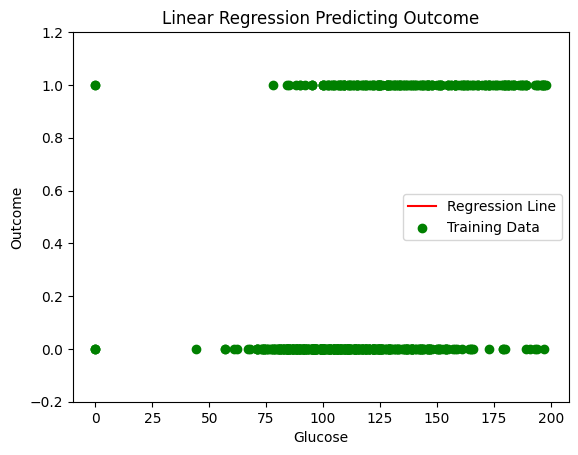

In [90]:
# Train model dan membuat plot
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, learning_rate=0.0001, iters=20)

📌Linear regression dirancang untuk memprediksi nilai kontinu, bukan kelas seperti "diabetes" (1) atau "tidak diabetes" (0).

📌 Linear Regression tidak ada decision boundary (misal, threshold), jadi model tidak tahun kapan harus memutuskan antara kelas 0 dan 1.

📌 Dalam Linear Regression, model mengasumsikan error mengikuti distribusi normal. Namun dataset Pima Diabetes memiliki outcome yang mengikuti distribusi Bernoulli yang hanya ada 2 kemungkinan saja (Diabetes atau Tidak Diabetes)


##### 🌺Logistic Regression

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [92]:
# Load dataset
df = pd.read_csv("pima_indians_diabetes_with_header.csv")
df = df.dropna()

X = df.drop(columns="Outcome").values
y = df["Outcome"].values

In [ ]:
# Normalisasi menggunakan Scalling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [94]:
# Split data into training and testing sets 
n_samples = X.shape[0]
split_index = int(0.8 * n_samples)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [95]:
# Inisialisasi parameter
learning_rate = 0.01
n_iter = 600
b = 0
w = np.zeros(X.shape[1])  #an array of weights for each X variables
print(w)

[0. 0. 0. 0. 0. 0. 0. 0.]


In [96]:
# Implement Logistic Regression functions with lambda
predict = lambda x, w, b: np.dot(w, x.T) + b
def sigmoid(x):
    return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))
loss_fn = lambda y, sig: -(y * np.log(sig) + (1 - y) * np.log(1 - sig)).mean()
dldw = lambda x, y, sig: (np.reshape(sig - y, (len(y), 1)) * x).mean(axis=0)
dldb = lambda y, sig: (sig - y).mean()
update = lambda a, g, lr: a - (g * lr)

In [97]:
# Training Loop
losses = []
for i in range(n_iter):
    yhat = predict(X_train, w, b)
    sig = sigmoid(yhat)
    logloss = loss_fn(y_train, sig)
    losses.append(logloss)

    grad_w = dldw(X_train, y_train, sig)
    grad_b = dldb(y_train, sig)

    w = update(w, grad_w, learning_rate)
    b = update(b, grad_b, learning_rate)

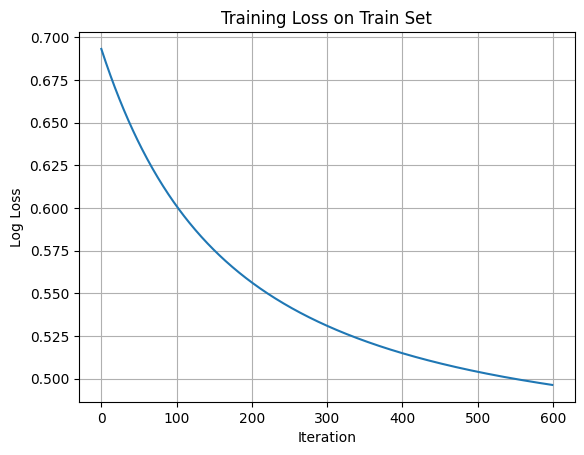

In [98]:
# Plot Loss Curve 
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.title("Training Loss on Train Set")
plt.grid(True)
plt.show()

In [99]:
# Evaluasi model pada data test
yhat_test = predict(X_test, w, b)
sig_test = sigmoid(yhat_test)
ypred_test = sig_test >= 0.5

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, ypred_test))


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.62      0.68        55

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



Dengan learning rate sebesar 0.01 dan iterasi 600 model Logistic Regression menghasilkan akurasi sebesar 0.79 (79%), artinya 79% dari seluruh prediksi outcome benar.